In [10]:
from utils import file_utils
colic_raw_data = file_utils.load_arff('datasets/colic.arff')
colic_raw_data

surgery       Age  rectal_temperature  pulse  respiratory_rate  \
0     b'no'  b'adult'                38.5   66.0              28.0   
1    b'yes'  b'adult'                39.2   88.0              20.0   
2     b'no'  b'adult'                38.3   40.0              24.0   
3    b'yes'  b'young'                39.1  164.0              84.0   
4     b'no'  b'adult'                37.3  104.0              35.0   
..      ...       ...                 ...    ...               ...   
363   b'no'  b'adult'                38.6   60.0              30.0   
364   b'no'  b'adult'                37.8   42.0              40.0   
365  b'yes'  b'adult'                38.0   60.0              12.0   
366   b'no'  b'adult'                38.0   42.0              12.0   
367   b'no'  b'adult'                37.6   88.0              36.0   

    temp_extremities peripheral_pulse  mucous_membranes capillary_refill_time  \
0            b'cool'       b'reduced'              b'?'                b'>=3'   
1               b'?'             b'?'  b'pale_cyanotic'                 b'<3'   
2          b'normal'        b'normal'      b'pale_pink'                 b'<3'   
3            b'cold'        b'normal'  b'dark_cyanotic'                b'>=3'   
4               b'?'             b'?'  b'dark_cyanotic'                b'>=3'   
..               ...              ...               ...                   ...   
363        b'normal'        b'normal'      b'pale_pink'                 b'<3'   
364        b'normal'        b'normal'    b'normal_pink'                 b'<3'   
365        b'normal'        b'normal'    b'bright_pink'                 b'<3'   
366          b'cool'             b'?'      b'pale_pink'                 b'<3'   
367          b'cool'        b'normal'    b'normal_pink'                 b'<3'   

                            pain  ... nasogastric_reflux  \
0      b'continuous_severe_pain'  ...               b'?'   
1      b'intermittent_mild_pain'  ...               b'?'   
2      b'intermittent_mild_pain'  ...               b'?'   
3                   b'depressed'  ...             b'>1l'   
4                           b'?'  ...               b'?'   
..                           ...  ...                ...   
363  b'intermittent_severe_pain'  ...            b'none'   
364             b'alert_no_pain'  ...               b'?'   
365                 b'depressed'  ...            b'none'   
366             b'alert_no_pain'  ...               b'?'   
367    b'intermittent_mild_pain'  ...             b'<1l'   

    nasogastric_reflux_PH rectal_examination  \
0                     NaN       b'decreased'   
1                     NaN          b'absent'   
2                     NaN          b'normal'   
3                     5.0       b'decreased'   
4                     NaN               b'?'   
..                    ...                ...   
363                   NaN               b'?'   
364                   NaN       b'decreased'   
365                   NaN          b'normal'   
366                   NaN               b'?'   
367                   1.5               b'?'   

                              abdomen  packed_cell_volume total_protein  \
0        b'distended_large_intestine'                45.0           8.4   
1                            b'other'                50.0          85.0   
2                           b'normal'                33.0           6.7   
3                                b'?'                48.0           7.2   
4                                b'?'                74.0           7.4   
..                                ...                 ...           ...   
363                              b'?'                40.0           6.0   
364  b'firm_feces_in_large_intestine'                36.0           6.2   
365      b'distended_small_intestine'                44.0          65.0   
366                         b'normal'                37.0           5.8   
367                              b'?'                44.0          

In [16]:
from pipelines.generic_pipline import clean_data_and_transform
colic_numeric_columns = ['rectal_temperature', 'pulse', 'respiratory_rate', 'nasogastric_reflux_PH', 'packed_cell_volume', 'total_protein', 'abdomcentesis_total_protein']
colic_string_columns_ordinal = ['surgery', 'Age', 'peripheral_pulse', 'temp_extremities','surgical_lesion']
colic_string_columns_one_hot = ['mucous_membranes','pain','rectal_examination','abdomen','abdominocentesis_appearance','outcome']
colic_clean_data = clean_data_and_transform(colic_raw_data, colic_numeric_columns, colic_string_columns_ordinal, colic_string_columns_one_hot)


In [17]:
from utils.aggregator import Aggregator

agg = Aggregator()
agg.evaluate(colic_clean_data)


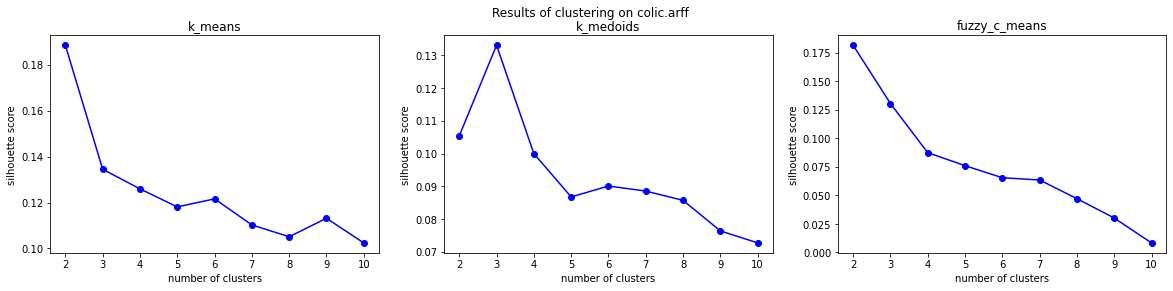

In [18]:
agg.plot_silhouette_score('colic.arff')

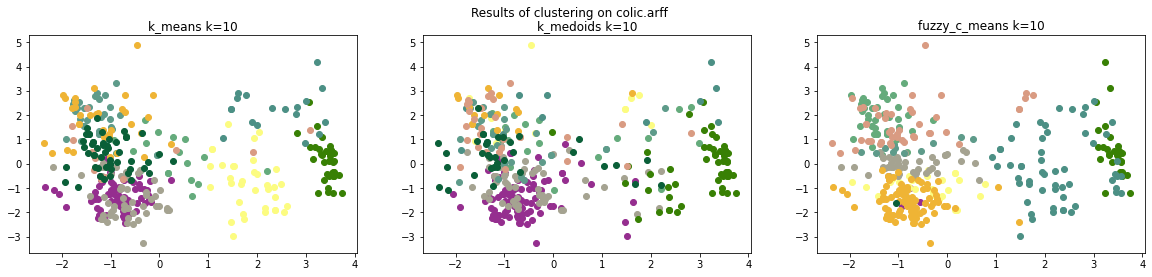

In [19]:
agg.plot_scatter_for_best_sc('colic.arff')